#### Prediction using Supervised ML
###### This is a simple linear regression. Our aim is to predict the score of students if they study for a particular hour

In [1]:
## Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Exploratory data analysis

In [3]:
# Checking summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<AxesSubplot:xlabel='Hours', ylabel='Density'>

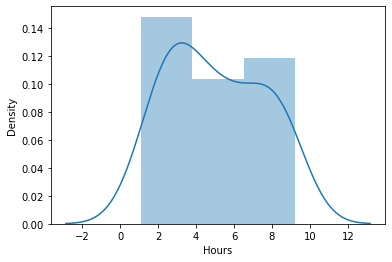

In [4]:
sns.distplot(df['Hours'])

In [5]:
from scipy.stats import skew

In [6]:
df['Hours'].skew()

0.1903382010052985

In [7]:
df['Scores'].skew()

0.2339646665397317

We can see that the data given are moderately skewed

### Plotting the relationship between hours and score

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


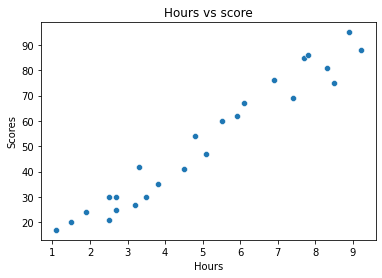

In [9]:
sns.scatterplot(x=df['Hours'], y=df['Scores'])
plt.title('Hours vs score')
plt.show()

From the graph above we can see that there is a positive linear relationship between Scores and Hours

### Data Pre-processing

In [10]:
# Let's split data into input and output
X = df[['Hours']]
Y = df[['Scores']]

In [11]:
# We can now use part of the dataset as our train data and the rest to test our model
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
print('Number of train data is:', x_train.shape[0])
print('Number of test data is:', x_test.shape[0])

Number of train data is: 20
Number of test data is: 5


### Training the algorithm

In [14]:
# Creating a function to compute different evaluation metrics
from sklearn import metrics
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
lr.score(x_train,y_train)

0.9491209376364416

In [18]:
lr.score(x_test,y_test)

0.9678055545167994

In [19]:
# Making Predictions
yhat = lr.predict(x_test)

In [20]:
print_evaluate(y_test,yhat)

MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288
R2 Square 0.9678055545167994


#### plotting distribution plot

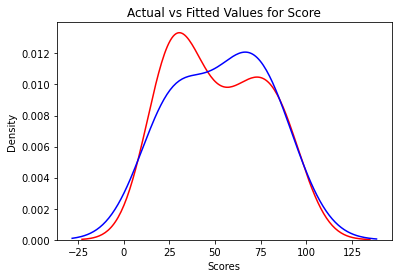

In [21]:
ax1 = sns.distplot(df['Scores'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Predicted Value" , ax=ax1)

plt.title('Actual vs Fitted Values for Score')

plt.show()
plt.close()

#### plotting the best fit line

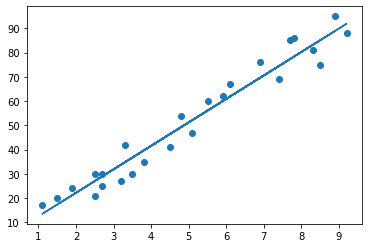

In [22]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [23]:
yhat

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [24]:
df2 = pd.DataFrame(y_test)
df2

,Scores
8,81
16,30
0,21
23,76
11,62


In [25]:
df2['Predicted'] = yhat
df2

,Scores,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


#### Predicted score if a student studies for  9.25hrs/day

In [26]:
lr.predict([[9.25]])

array([[92.38611528]])

### If a student studies for 9.25hrs/day the predicted score will be 92.37